In [1]:
import pandas as pd
# from sqlalchemy import sql
import pandasql as ps
import json
import os 
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
# import pandasql as ps
import numpy as np
#pd.set_option("display.precision", 8)

In [3]:
no_errors_files = []
raha_erros_file = []

In [16]:
repition = range(1, 3)
labeling_budgets = range(20, 21)
sandbox_path = "./raha/raha/datasets/raha-datasets" # path towards the data lake (this dataset is not in this repository, but in another)
results_path = "./results/raha-datasets/enough/exp_raha-enough-labels-5-datasets" # path towards the experiment folder, where the results are stored
dir_levels = 1 # That means we have files in each subdirectory of sandbox dir
datasets = []
algorithm = 'raha'


if dir_levels == 1:
    for dir in os.listdir(sandbox_path):
        datasets.append(dir)

# "actuall_errors_json":[]

results_dict = {"algorithm":[], "dataset":[], "execution_number":[], 
              "precision": [], "recall": [], "f_score": [],
                "tp": [], "ed_tpfp": [], "ed_tpfn": [], "execution_time": [],
                 "number_of_labeled_tuples": [], "number_of_labeled_cells": [], "detected_errors_keys":[]}
count = 0 
d = []
for i in repition:
    for dataset in datasets:
        if dataset not in no_errors_files and dataset not in raha_erros_file:
            for label_budget in labeling_budgets:
                # "/{}_labels_{}_execution".format(label_budget, i) +
                file_path = results_path + '/{}_{}_number#{}_${}$labels.json'\
                            .format(algorithm, dataset, str(i), str(label_budget))
                if os.path.exists(file_path):
                    with open(file_path) as file:
                        json_content = json.load(file)
                        results_dict['algorithm'].append(algorithm)
                        results_dict['dataset'].append(dataset)
                        # results_dict['dataset_shape'].append(json_content['dataset_shape'])
                        results_dict['execution_number'].append(i)
                        results_dict['precision'].append(json_content['precision'])
                        results_dict['recall'].append(json_content['recall'])
                        results_dict['f_score'].append(json_content['f_score'])
                        results_dict['tp'].append(json_content['tp'])
                        results_dict['ed_tpfp'].append(json_content['ed_tpfp'])
                        results_dict['ed_tpfn'].append(json_content['ed_tpfn'])
                        results_dict['execution_time'].append(json_content['execution-time'])
                        results_dict['number_of_labeled_tuples'].append(json_content['number_of_labeled_tuples'])
                        results_dict['number_of_labeled_cells'].append(json_content['number_of_labeled_cells'])
                        results_dict['detected_errors_keys'].append(json_content['detected_errors_keys'])
                else:
                    print("The file does not exist: {}".format(file_path))
                    print()
        
result_df = pd.DataFrame.from_dict(results_dict)
# result_df.to_csv("Benchmarks/raha/results/results_all_{}.csv".format(algorithm))


In [17]:
result_df["execution_time"].sum()

197.66472053527832

In [15]:
result_df[result_df["number_of_labeled_tuples"] == 1]["number_of_labeled_cells"].sum()

132

In [9]:
query = "SELECT execution_number, number_of_labeled_tuples, SUM(number_of_labeled_cells) as total_number_of_labeled_cells, SUM(tp)/SUM(ed_tpfp) as total_precision,  SUM(tp)/SUM(ed_tpfn) as total_recall from result_df group by execution_number, number_of_labeled_tuples"
df_res = ps.sqldf(query)
# query_df_res = "SELECT execution_number, number_of_labeled_tuples, total_number_of_labeled_cells, total_precision, total_recall, 2*(total_precision*total_recall)/(total_precision+total_recall) as total_fscore from df_res group by execution_number, number_of_labeled_tuples"
# f_score_df = ps.sqldf(query_df_res)
# avg_query = "SELECT number_of_labeled_tuples, total_number_of_labeled_cells, SUM(total_precision)/3, SUM(total_recall)/3, SUM(total_fscore)/3 from f_score_df group by number_of_labeled_tuples"
# avg_df = ps.sqldf(avg_query)


InterfaceError: (sqlite3.InterfaceError) Error binding parameter 12 - probably unsupported type.
[SQL: INSERT INTO result_df (algorithm, dataset, execution_number, precision, recall, f_score, tp, ed_tpfp, ed_tpfn, execution_time, number_of_labeled_tuples, number_of_labeled_cells, detected_errors_keys) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: [('raha', 'cou_2', 1, 0.0, 0.0, 0.0, 0.0, 0.0, 74, 2.8631086349487305, 1, 21, []), ('raha', 'cou_2', 1, 0.4, 0.16216216216216217, 0.23076923076923078, 12.0, 30.0, 74, 0.3263208866119385, 2, 42, [[4, 2], [5, 2], [8, 2], [17, 2], [24, 2], [25, 2], [38, 2], [50, 2], [51, 2], [52, 2], [62, 2], [72, 2], [75, 2], [80, 2], [85, 2], [104, 2], [109, 2], [110, 2], [126, 2], [133, 2], [134, 2], [147, 2], [156, 2], [164, 2], [165, 2], [173, 2], [174, 2], [176, 2], [177, 2], [178, 2]]), ('raha', 'cou_2', 1, 0.7619047619047619, 0.21621621621621623, 0.3368421052631579, 16.0, 21.0, 74, 0.356640100479126, 3, 63, [[20, 3], [44, 3], [51, 3], [54, 3], [67, 3], [70, 3], [75, 3], [98, 3], [103, 3], [108, 3], [109, 3], [117, 3], [131, 3], [136, 3], [146, 3], [149, 3], [150, 3], [154, 3], [174, 3], [175, 3], [178, 3]]), ('raha', 'cou_2', 1, 0.2, 0.02702702702702703, 0.047619047619047616, 2.0, 10.0, 74, 0.3873114585876465, 4, 84, [[2, 8], [19, 8], [44, 8], [79, 8], [94, 8], [108, 8], [124, 8], [137, 8], [160, 8], [172, 8]]), ('raha', 'cou_2', 1, 0.14583333333333334, 0.1891891891891892, 0.1647058823529412, 14.0, 96.0, 74, 0.43457818031311035, 5, 105, [[1, 2], [3, 2], [4, 2], [5, 2], [7, 2], [8, 2], [10, 2], [11, 2], [12, 2], [17, 2], [18, 2], [23, 2], [24, 2], [25, 2], [27, 2], [31, 2], [33, 2], [3 ... (602 characters truncated) ...  [154, 2], [156, 2], [158, 2], [159, 2], [164, 2], [165, 2], [168, 2], [170, 2], [171, 2], [172, 2], [173, 2], [174, 2], [176, 2], [177, 2], [178, 2]]), ('raha', 'cou_2', 1, 0.41935483870967744, 0.17567567567567569, 0.2476190476190476, 13.0, 31.0, 74, 0.48087596893310547, 6, 126, [[4, 2], [5, 2], [8, 2], [17, 2], [24, 2], [25, 2], [38, 2], [50, 2], [51, 2], [52, 2], [62, 2], [72, 2], [75, 2], [80, 2], [85, 2], [104, 2], [109, 2], [110, 2], [126, 2], [133, 2], [134, 2], [147, 2], [156, 2], [164, 2], [165, 2], [173, 2], [174, 2], [176, 2], [177, 2], [178, 2], [19, 8]]), ('raha', 'cou_2', 1, 0.6818181818181818, 0.20270270270270271, 0.3125, 15.0, 22.0, 74, 0.5090973377227783, 7, 147, [[17, 2], [24, 2], [25, 2], [52, 2], [104, 2], [110, 2], [126, 2], [133, 2], [134, 2], [156, 2], [173, 2], [174, 2], [3, 8], [39, 8], [59, 8], [63, 8], [75, 8], [130, 8], [153, 8], [169, 8], [177, 8], [178, 8]]), ('raha', 'cou_2', 1, 0.4, 0.02702702702702703, 0.05063291139240506, 2.0, 5.0, 74, 0.5063245296478271, 8, 168, [[2, 8], [11, 8], [91, 8], [94, 8], [137, 8]])  ... displaying 10 of 1600 total bound parameter sets ...  ('raha', 'imdb', 10, 0.3942307692307692, 0.3319838056680162, 0.3604395604395605, 82.0, 208.0, 247, 3.2123026847839355, 19, 266, [[46, 4], [62, 4], [93, 4], [129, 4], [150, 4], [167, 4], [172, 4], [191, 4], [193, 4], [197, 4], [236, 4], [267, 4], [295, 4], [304, 4], [312, 4], [3 ... (1895 characters truncated) ... 9, 12], [890, 12], [918, 12], [919, 12], [921, 12], [922, 12], [927, 12], [933, 12], [934, 12], [938, 12], [941, 12], [945, 12], [955, 12], [957, 12]]), ('raha', 'imdb', 10, 0.5919540229885057, 0.41700404858299595, 0.48931116389548696, 103.0, 174.0, 247, 3.311022996902466, 20, 280, [[9, 1], [12, 1], [17, 1], [36, 1], [62, 1], [107, 1], [115, 1], [176, 1], [184, 1], [185, 1], [198, 1], [211, 1], [239, 1], [260, 1], [267, 1], [280, ... (1458 characters truncated) ... 6, 12], [720, 12], [728, 12], [741, 12], [752, 12], [758, 12], [783, 12], [858, 12], [881, 12], [889, 12], [934, 12], [941, 12], [955, 12], [957, 12]])]]
(Background on this error at: https://sqlalche.me/e/20/rvf5)

In [ ]:
avg_df.to_csv("avg.df.csv")

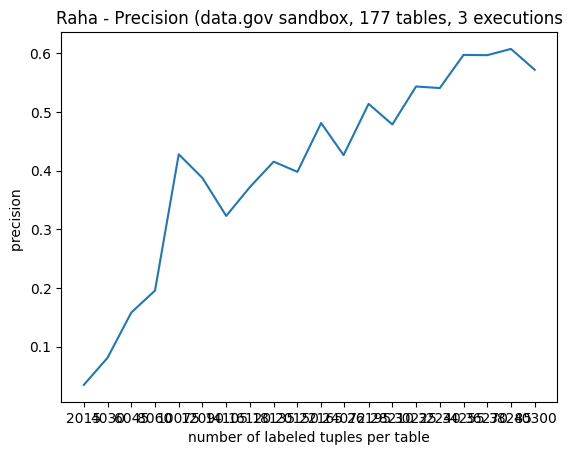

In [23]:
x_axis = avg_df["total_number_of_labeled_cells"]
y_axis = avg_df['SUM(total_precision)/3']

#plt.xlim([0, 20])
plt.plot(x_axis, y_axis)
plt.title('Raha - Precision (data.gov sandbox, 177 tables, 3 executions')
plt.xlabel('number of labeled tuples per table')
plt.ylabel('precision ')
plt.xticks(x_axis, x_axis)
#plt.show()
plt.savefig('precision-raha.png')



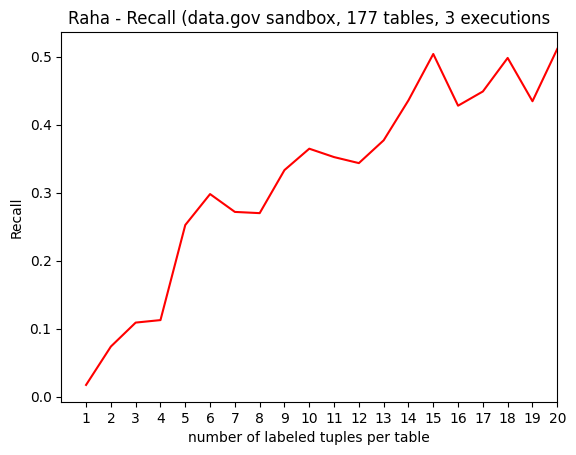

In [18]:
x_axis = avg_df["number_of_labeled_tuples"]
y_axis = avg_df['SUM(total_recall)/3']

plt.xlim([0, 20])
plt.plot(x_axis, y_axis, color="red")
plt.title('Raha - Recall (data.gov sandbox, 177 tables, 3 executions')
plt.xlabel('number of labeled tuples per table')
plt.ylabel('Recall')
plt.xticks(range(1, 21), x_axis)
#plt.show()
plt.savefig('recall-raha.png')


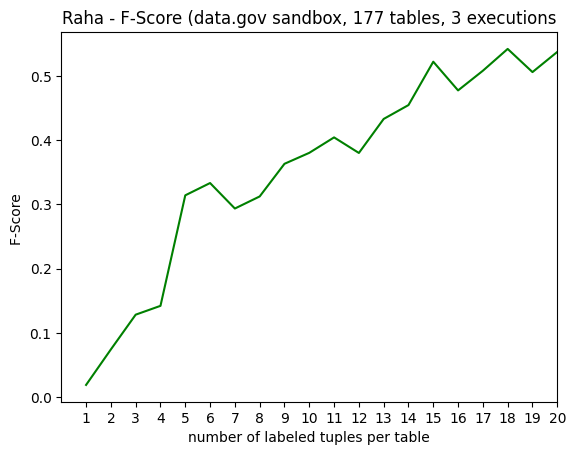

In [24]:
x_axis = avg_df["number_of_labeled_tuples"]
y_axis = avg_df['SUM(total_fscore)/3']

plt.xlim([0, 20])
plt.plot(x_axis, y_axis, color="green")
plt.title('Raha - F-Score (data.gov sandbox, 177 tables, 3 executions')
plt.xlabel('number of labeled tuples per table')
plt.ylabel('F-Score ')
plt.xticks(range(1, 21), x_axis)
# plt.show()
plt.savefig('fscore-raha.png')


In [ ]:
len(d)

In [ ]:
sum(result_df["number_of_labeled_cells"])

In [ ]:
p = sum(result_df["tp"])/sum(result_df["ed_tpfp"])
r = sum(result_df["tp"])/sum(result_df["ed_tpfn"])
f = 2 * p * r / (p+r)

print(p,r , f)

In [ ]:
f

In [ ]:
results_dates = {"name": [], "ts": [], "date": []}
path_prefix_to_ED_SCALE = "your_path_towards_ED-Scale_repository" # this needs to be set before execution set to the path that Points toward the ED-Scale repository
path =path_prefix_to_ED_SCALE + "/Sandbox_Generation/data-gov-raha-results-1"
with os.scandir(path) as it:
    for entry in it:
        if not entry.name.startswith('.') and entry.is_file():
            results_dates["name"].append(entry.name)
            results_dates["ts"].append(entry.stat().st_ctime)
            results_dates["date"].append(datetime.utcfromtimestamp(int(entry.stat().st_ctime)).strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
## Get Files and Creation Dates 

In [ ]:
results_dates_df = pd.DataFrame.from_dict(results_dates)

In [ ]:
query = "SELECT * from results_dates_df WHERE ts >= 1672700400 and ts < 1672786800"
ps.sqldf(query)

In [ ]:
result_df

In [1]:
import pickle 

with open("./results/raha-datasets/exp_raha-non-enough-labels-5-datasets/labeling_budget.pickle", "rb") as file:
    labeling_budget = pickle.load(file)

In [2]:
labeling_budget

{'raha/datasets/raha-datasets/beers': 2,
 'raha/datasets/raha-datasets/flights': 2,
 'raha/datasets/raha-datasets/rayyan': 2,
 'raha/datasets/raha-datasets/hospital': 1,
 'raha/datasets/raha-datasets/movies_1': 2}